# WeatherPy

---

## Starter Code to Generate Random Geographic Coordinates and a List of Cities

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress

# Import the OpenWeatherMap API key
from api_keys import weather_api_key

# Import citipy to determine the cities based on latitude and longitude
from citipy import citipy

### Generate the Cities List by Using the `citipy` Library

In [2]:
# Empty list for holding the latitude and longitude combinations
lat_lngs = []

# Empty list for holding the cities names
cities = []

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name

    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
print(f"Number of cities in the list: {len(cities)}")

Number of cities in the list: 584


---

## Requirement 1: Create Plots to Showcase the Relationship Between Weather Variables and Latitude

### Use the OpenWeatherMap API to retrieve weather data from the cities list generated in the started code

In [18]:
# Set the API base URL
url = "http://api.openweathermap.org/data/2.5/weather"

# Define an empty list to fetch the weather data for each city
city_data = []

# Print to logger
print("Beginning Data Retrieval")
print("-----------------------------")

# Create counters
record_count = 1
set_count = 1

# Loop through all the cities in our list to fetch weather data
for i, city in enumerate(cities):
    
    # Group cities in sets of 50 for logging purposes
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 1  # Reset record count for new set

    # Create endpoint URL with each city
    city_url = f"{url}?q={city.replace(' ', '%20')}&appid={weather_api_key}&units=metric"

    # Log the url, record, and set numbers
    print(f"Processing Record {record_count} of Set {set_count} | {city}")

    # Add 1 to the record count
    record_count += 1

    # Run an API request for each of the cities
    try:
        response = requests.get(city_url)
        response.raise_for_status()  # Raise an error if request fails
        city_weather = response.json()

        # Parse out latitude, longitude, max temp, humidity, cloudiness, wind speed, country, and date
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
        city_date = city_weather["dt"]

        # Append the City information into city_data list
        city_data.append({
            "City": city,
            "Lat": city_lat,
            "Lng": city_lng,
            "Max Temp": city_max_temp,
            "Humidity": city_humidity,
            "Cloudiness": city_clouds,
            "Wind Speed": city_wind,
            "Country": city_country,
            "Date": city_date
        })

    # If an error is experienced, skip the city
    except Exception as e:
        print(f"City not found. Skipping {city}. Error: {e}")
        pass

    # Pause to avoid rate limiting
    time.sleep(1.0)

# Indicate that Data Loading is complete
print("-----------------------------")
print("Data Retrieval Complete")
print("-----------------------------")

Beginning Data Retrieval
-----------------------------
Processing Record 1 of Set 1 | queenstown
Processing Record 2 of Set 1 | port elizabeth
Processing Record 3 of Set 1 | bilibino
Processing Record 4 of Set 1 | tura
Processing Record 5 of Set 1 | margaret river
Processing Record 6 of Set 1 | blackmans bay
Processing Record 7 of Set 1 | georgetown
Processing Record 8 of Set 1 | grytviken
Processing Record 9 of Set 1 | coahuayana de hidalgo
Processing Record 10 of Set 1 | waitangi
Processing Record 11 of Set 1 | bethel
Processing Record 12 of Set 1 | calvi
Processing Record 13 of Set 1 | avarua
Processing Record 14 of Set 1 | lebu
Processing Record 15 of Set 1 | broken hill
Processing Record 16 of Set 1 | vila do maio
Processing Record 17 of Set 1 | olonkinbyen
Processing Record 18 of Set 1 | adamstown
Processing Record 19 of Set 1 | carnarvon
Processing Record 20 of Set 1 | talnakh
Processing Record 21 of Set 1 | suva
Processing Record 22 of Set 1 | happy valley-goose bay
Processing 

In [19]:
# Convert the cities weather data into a Pandas DataFrame
city_data_df = pd.DataFrame(city_data)

# Show Record Count
city_data_df.count()

City          556
Lat           556
Lng           556
Max Temp      556
Humidity      556
Cloudiness    556
Wind Speed    556
Country       556
Date          556
dtype: int64

In [20]:
# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,queenstown,-31.8976,26.8753,18.26,82,13,2.29,ZA,1736485003
1,port elizabeth,-33.9180,25.5701,22.40,84,40,3.09,ZA,1736485005
2,bilibino,68.0546,166.4372,-27.35,99,100,1.07,RU,1736485006
3,tura,25.5198,90.2201,22.87,43,0,1.34,IN,1736485007
4,margaret river,-33.9500,115.0667,21.77,59,100,5.25,AU,1736485009


In [21]:
# Export the City_Data into a csv
city_data_df.to_csv("output_data/cities.csv", index_label="City_ID")

In [22]:
# Read saved data
city_data_df = pd.read_csv("output_data/cities.csv", index_col="City_ID")

# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,queenstown,-31.8976,26.8753,18.26,82,13,2.29,ZA,1736485003
1,port elizabeth,-33.9180,25.5701,22.40,84,40,3.09,ZA,1736485005
2,bilibino,68.0546,166.4372,-27.35,99,100,1.07,RU,1736485006
3,tura,25.5198,90.2201,22.87,43,0,1.34,IN,1736485007
4,margaret river,-33.9500,115.0667,21.77,59,100,5.25,AU,1736485009


### Create the Scatter Plots Requested

#### Latitude Vs. Temperature

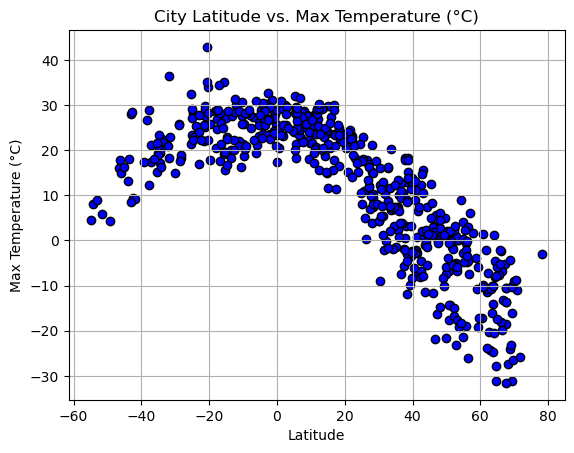

In [23]:
# Build scatter plot for latitude vs. temperature
plt.scatter(city_data_df["Lat"], city_data_df["Max Temp"], c="blue", edgecolors="black")

# Incorporate the other graph properties
plt.xlabel("Latitude")
plt.ylabel("Max Temperature (°C)")
plt.title("City Latitude vs. Max Temperature (°C)")
plt.grid(True)

# Save the figure
plt.savefig("output_data/Fig1.png")

# Show plot
plt.show()

#### Latitude Vs. Humidity

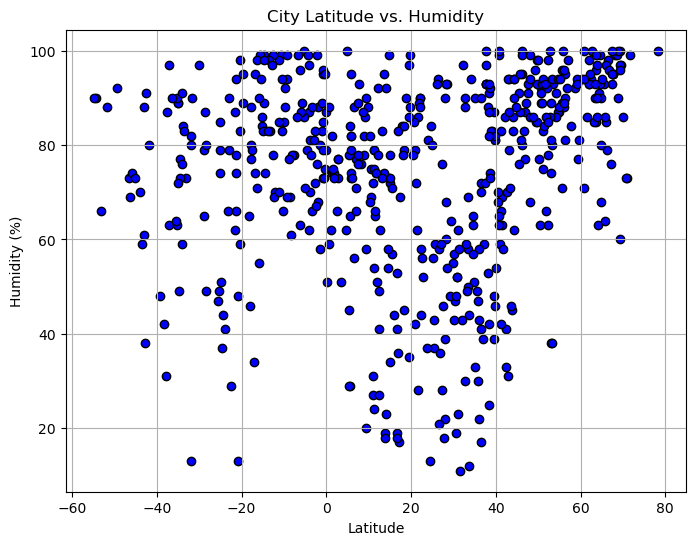

In [24]:
# Build the scatter plot for latitude vs. humidity
plt.figure(figsize=(8,6))
plt.scatter(city_data_df["Lat"], city_data_df["Humidity"], c="blue", edgecolors="black")

# Incorporate the other graph properties
plt.xlabel("Latitude")
plt.ylabel("Humidity (%)")
plt.title("City Latitude vs. Humidity")
plt.grid(True)

# Save the figure
plt.savefig("output_data/Fig2.png")

# Show plot
plt.show()

#### Latitude Vs. Cloudiness

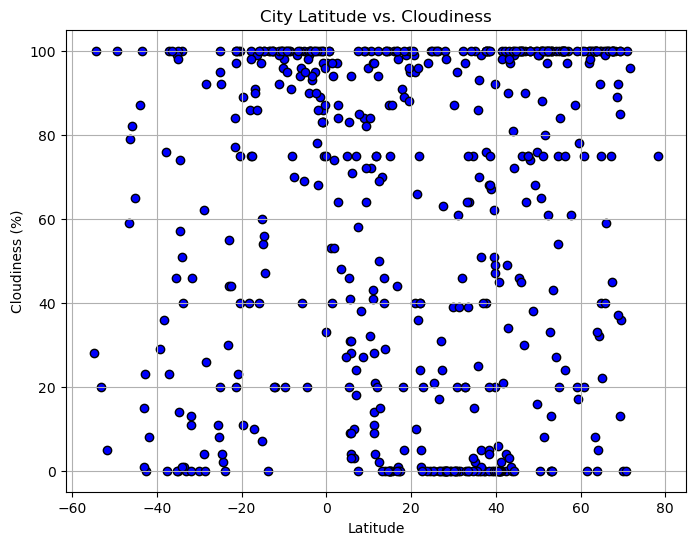

In [25]:
# Build the scatter plot for latitude vs. cloudiness
plt.figure(figsize=(8,6))
plt.scatter(city_data_df["Lat"], city_data_df["Cloudiness"], c="blue", edgecolors="black")

# Incorporate the other graph properties
plt.xlabel("Latitude")
plt.ylabel("Cloudiness (%)")
plt.title("City Latitude vs. Cloudiness")
plt.grid(True)

# Save the figure
plt.savefig("output_data/Fig3.png")

# Show plot
plt.show()

#### Latitude vs. Wind Speed Plot

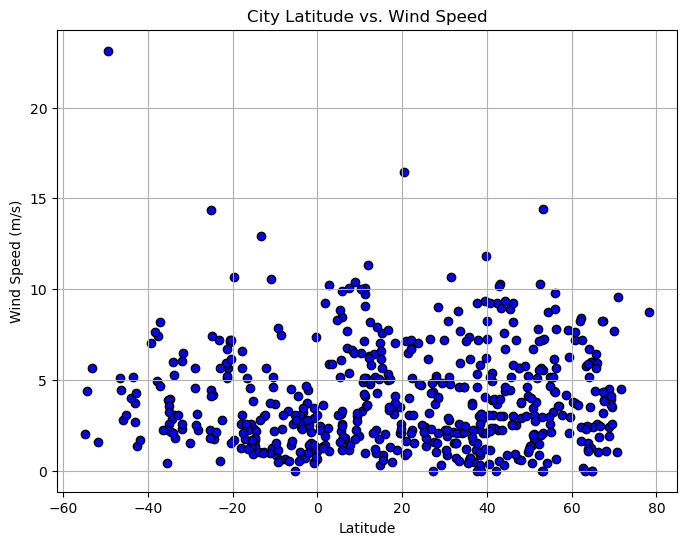

In [26]:
# Build the scatter plot for latitude vs. wind speed
plt.figure(figsize=(8,6))
plt.scatter(city_data_df["Lat"], city_data_df["Wind Speed"], c="blue", edgecolors="black")

# Incorporate the other graph properties
plt.xlabel("Latitude")
plt.ylabel("Wind Speed (m/s)")
plt.title("City Latitude vs. Wind Speed")
plt.grid(True)

# Save the figure
plt.savefig("output_data/Fig4.png")

# Show plot
plt.show()

---

## Requirement 2: Compute Linear Regression for Each Relationship


In [27]:
# Define a function to create Linear Regression plots
def plot_linear_regression(x_values, y_values, xlabel, ylabel, title, filename):
    # Perform linear regression
    (slope, intercept, r_value, _, _) = linregress(x_values, y_values)
    
    # Calculate regression line
    regression_line = slope * x_values + intercept
    
    # Create scatter plot
    plt.figure(figsize=(8,6))
    plt.scatter(x_values, y_values, c="blue", edgecolors="black")
    
    # Plot regression line
    plt.plot(x_values, regression_line, color="red", linewidth=2)

    # Add labels, title, and grid
    plt.xlabel(xlabel)
    plt.ylabel(ylabel)
    plt.title(f"{title}\nR² = {r_value**2:.3f}")
    plt.grid(True)

    # Save the figure
    plt.savefig(f"output_data/{filename}.png")

    # Show plot
    plt.show()

In [28]:
# Create a DataFrame with the Northern Hemisphere data (Latitude >= 0)
northern_hemi_df = city_data_df[city_data_df["Lat"] >= 0]

# Display sample data
northern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
2,bilibino,68.0546,166.4372,-27.35,99,100,1.07,RU,1736485006
3,tura,25.5198,90.2201,22.87,43,0,1.34,IN,1736485007
6,georgetown,5.4112,100.3354,31.97,45,20,5.14,MY,1736485011
8,coahuayana de hidalgo,18.7000,-103.6583,22.41,90,99,1.14,MX,1736485014
10,bethel,41.3712,-73.4140,-2.81,69,100,3.09,US,1736484854


In [29]:
# Create a DataFrame with the Southern Hemisphere data (Latitude < 0)
southern_hemi_df = city_data_df[city_data_df["Lat"] < 0]

# Display sample data
southern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,queenstown,-31.8976,26.8753,18.26,82,13,2.29,ZA,1736485003
1,port elizabeth,-33.9180,25.5701,22.40,84,40,3.09,ZA,1736485005
4,margaret river,-33.9500,115.0667,21.77,59,100,5.25,AU,1736485009
5,blackmans bay,-43.0167,147.3167,28.07,61,15,3.75,AU,1736485010
7,grytviken,-54.2811,-36.5092,8.03,90,100,4.38,GS,1736485013


###  Temperature vs. Latitude Linear Regression Plot

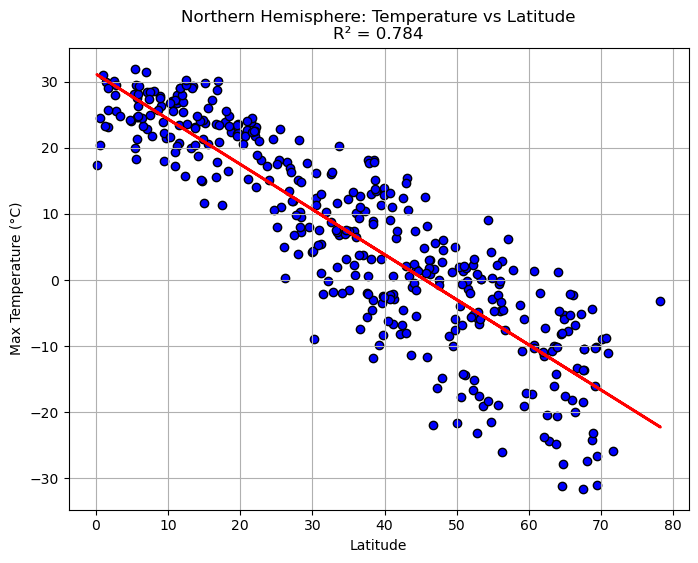

In [30]:
# Perform Linear Regression on Northern Hemisphere Temperature vs. Latitude
plot_linear_regression(northern_hemi_df["Lat"], northern_hemi_df["Max Temp"],
                       "Latitude", "Max Temperature (°C)", 
                       "Northern Hemisphere: Temperature vs Latitude",
                       "Linear_Temp_Northern")

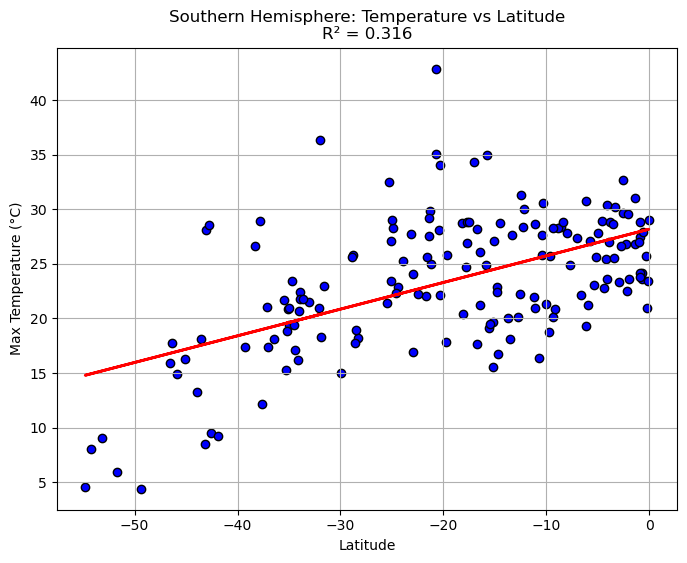

In [31]:
# Linear regression on Southern Hemisphere
plot_linear_regression(southern_hemi_df["Lat"], southern_hemi_df["Max Temp"],
                       "Latitude", "Max Temperature (°C)", 
                       "Southern Hemisphere: Temperature vs Latitude",
                       "Linear_Temp_Southern")

**Discussion about the linear relationship:** There is a strong negative correlation between latitude and temperature. In the northern hemisphere, as we move away from the equator, temperature decreases. In the southern hemisphere, temperature increases as we move towards the equator. In the northern hemisphere, Latitude is a strong predictor of temperature r^2 = .784.

### Humidity vs. Latitude Linear Regression Plot

The r^2-value is: 0.007659599322853922


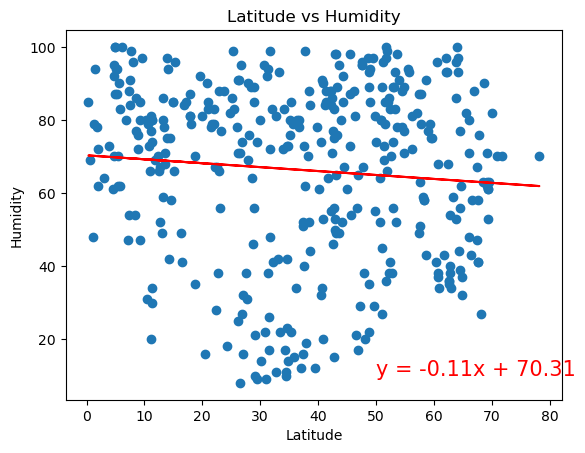

In [17]:
# Northern Hemisphere
# YOUR CODE HERE

The r^2-value is: 0.00014367159540169783


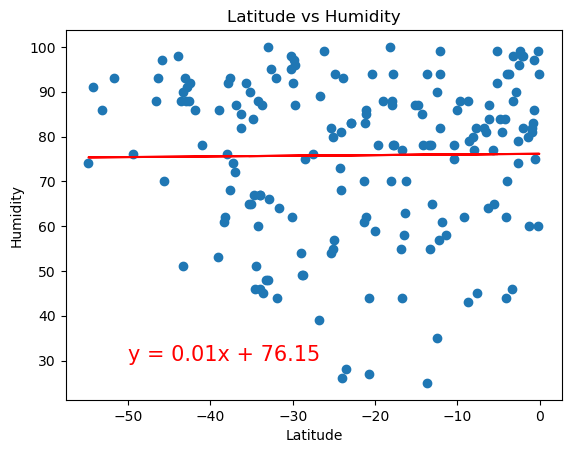

In [23]:
# Southern Hemisphere
# YOUR CODE HERE

**Discussion about the linear relationship:** YOUR RESPONSE HERE

### Cloudiness vs. Latitude Linear Regression Plot

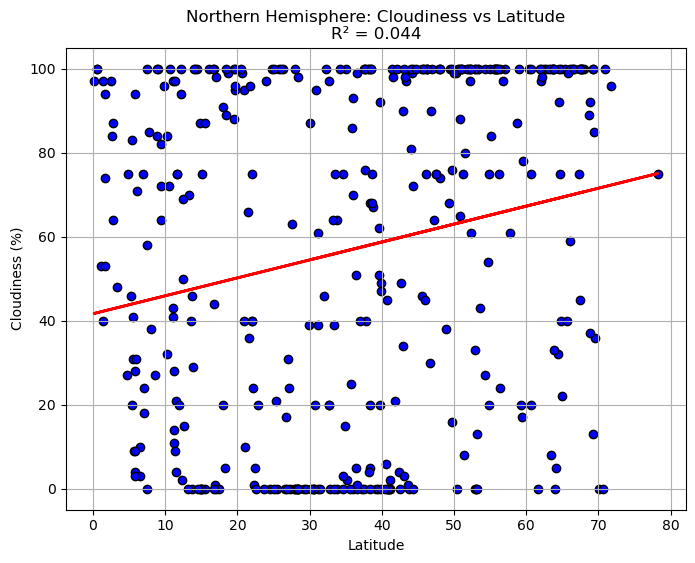

In [32]:
# Northern Hemisphere
plot_linear_regression(northern_hemi_df["Lat"], northern_hemi_df["Cloudiness"],
                       "Latitude", "Cloudiness (%)", 
                       "Northern Hemisphere: Cloudiness vs Latitude",
                       "Linear_Cloudiness_Northern")

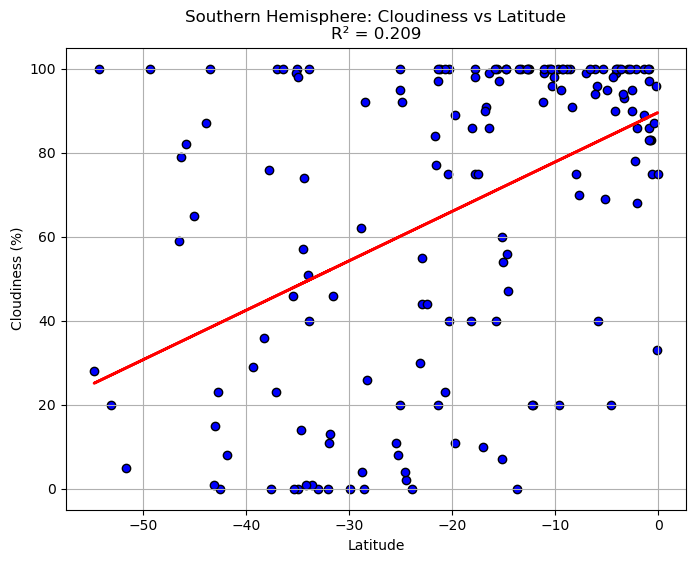

In [33]:
# Southern Hemisphere
plot_linear_regression(southern_hemi_df["Lat"], southern_hemi_df["Cloudiness"],
                       "Latitude", "Cloudiness (%)", 
                       "Southern Hemisphere: Cloudiness vs Latitude",
                       "Linear_Cloudiness_Southern")

**Discussion about the linear relationship:** Latitude is not predictive of cloudiness in the northern hemisphere, R^2 = 0.044 and a weak predictor of cloudiness in the southern hemisphere, R^2 = .209

### Wind Speed vs. Latitude Linear Regression Plot

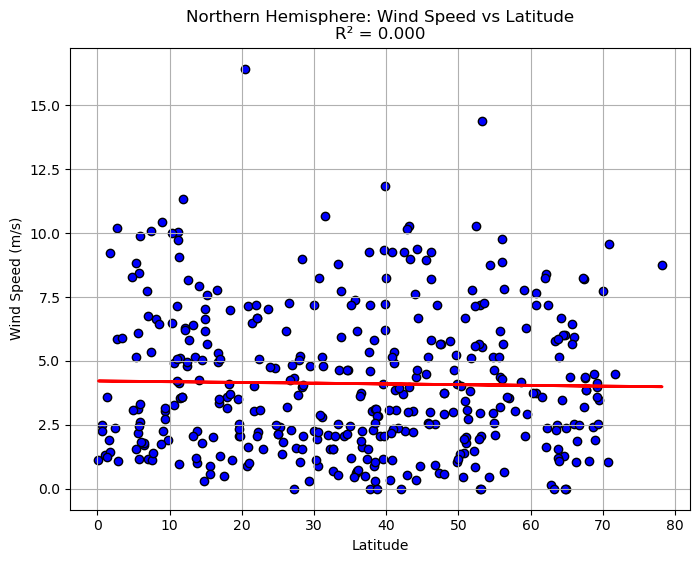

In [34]:
# Northern Hemisphere
plot_linear_regression(northern_hemi_df["Lat"], northern_hemi_df["Wind Speed"],
                       "Latitude", "Wind Speed (m/s)", 
                       "Northern Hemisphere: Wind Speed vs Latitude",
                       "Linear_WindSpeed_Northern")

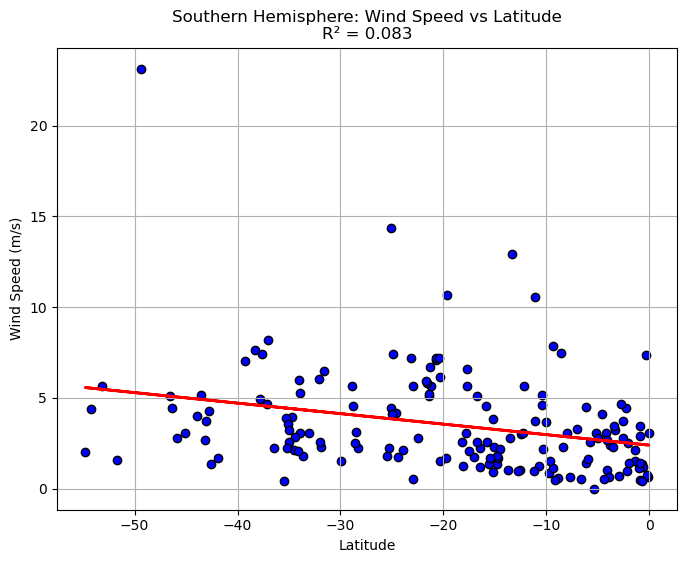

In [35]:
# Southern Hemisphere
plot_linear_regression(southern_hemi_df["Lat"], southern_hemi_df["Wind Speed"],
                       "Latitude", "Wind Speed (m/s)", 
                       "Southern Hemisphere: Wind Speed vs Latitude",
                       "Linear_WindSpeed_Southern")

**Discussion about the linear relationship:** Latitude, for both hemispheres, is uncorrelated with wind speed and thus not predictive of wind speed.